In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pred_3000 = pd.read_csv('./train_3000_avg_pred.csv')
pred_30465 = pd.read_csv('./train_30465_avg_pred.csv')
pred_33465 = pd.read_csv('./train_33465_avg_pred.csv')

In [43]:
# #
# plt.figure(figsize=(20,10))
# plt.subplot(121)
# plt.plot(pred_3000.id, pred_3000.score)
# plt.title('pred_3000')
# plt.subplot(122)
# plt.plot(pred_33465.id, pred_33465.score)
# plt.title('pred_30465')

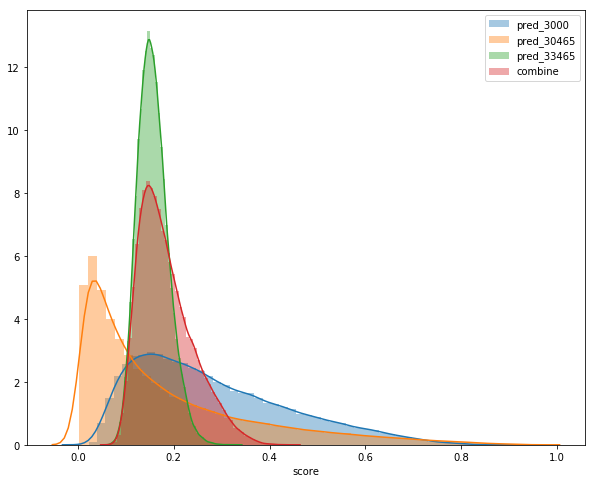

In [58]:
w1, w2, w3 = 0.2, 0.1, 0.7
plt.figure(figsize=(10,8))
sns.distplot(pred_3000.score)
sns.distplot(pred_30465.score)
sns.distplot(pred_33465.score)
sns.distplot(w1*pred_3000.score + w2*pred_30465.score + w3*pred_33465.score)
plt.legend(['pred_3000','pred_30465','pred_33465','combine'])

In [59]:
com_score = w1*pred_3000.score + w2*pred_30465.score + w3*pred_33465.score

In [60]:
pred_all = pred_3000[['id']].copy()
pred_all['label'] = com_score

In [61]:
import numpy as np
upper = np.percentile(com_score,95)
downer = np.percentile(com_score,10)
print('upper:',upper,' downer:',downer)

upper: 0.2930906469  downer: 0.12150934112000003


In [62]:
pred_all.loc[(pred_all.label>upper).values,'label']=1
pred_all.loc[(pred_all.label<downer).values,'label']=0
filter = (pred_all.label>upper)|(pred_all.label<downer)

# filter = pred_all.label>upper
pred_selec= pred_all.iloc[filter.values]

In [63]:
pred_selec = pred_selec.astype({'label':np.int64})

In [64]:
unlabel_y = pred_selec.reset_index(drop=True)
sum(unlabel_y.label==1)

3327

In [65]:
unlabel_y.to_csv('unlabel_y.csv', index=False)